# Introduction to Programming Artificial Intelligence 

## Class 12 - Keras ANN Classification

### Exercise 1
Import Keras, and any others packages that you will need

In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import keras as keras

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from numpy import array

from statistics import mean as mean
from statistics import stdev as stddev



import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8] # set plot size


2021-12-17 06:43:16.260081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-17 06:43:16.260104: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Exercise 2
We want to use loan default as the category so create a new column in the Pandas, “Default”. Take the “Loan Status” feature and map it to the strings “Default” or “Serviced” using a lambda.

In [2]:
loan = pd.read_csv ("http://raptor.kent.ac.uk/~ds756/loan.csv")

subLoan = loan.drop (columns=['ID', 'Funded Amount Investor',
 "Batch Enrolled",
 'Grade', 'Sub Grade',
 'Employment Duration', 'Home Ownership', 'Verification Status',
 'Payment Plan', 'Loan Title',
 'Delinquency - two years', 'Inquires - six months', 'Open Account',
 'Public Record', 'Revolving Balance',
 'Total Accounts', 'Initial List Status', 'Total Received Interest',
 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
 'Collection 12 months Medical', 'Application Type', 'Last week Pay',
 'Accounts Delinquent', 'Total Collection Amount',
 'Total Current Balance'])

subLoan["Default"] = pd.Series (map (lambda x: "Serviced" if x else "Default", subLoan["Loan Status"]))

### Exercise 3 
Drop the “Loan Status” column.

In [3]:
subLoan = subLoan.drop (columns=['Loan Status'])

In [4]:
subLoan

,Loan Amount,Funded Amount,Term,Interest Rate,Debit to Income,Revolving Utilities,Total Revolving Credit Limit,Default
0,10000,32236,59,11.135007,16.284758,74.932551,6619,Default
1,3609,11940,59,12.237563,15.412409,78.297186,20885,Default
2,28276,9311,59,12.545884,28.137619,2.073040,26155,Default
3,11170,6954,59,16.731201,18.043730,67.467951,60214,Default
4,16890,13226,59,15.008300,17.209886,85.250761,22579,Default
...,...,...,...,...,...,...,...,...
1258,13601,6848,59,9.408858,28.105127,97.779389,34301,Serviced
1259,8323,11046,59,9.972104,17.694279,15.690703,8714,Default
1260,15897,32921,59,19.650943,10.295774,1.500090,42330,Default
1261,16567,4975,59,13.169095,7.614624,68.481882,39075,Default


### Exercise 4
Turn the Pandas into an array.

In [5]:
data = subLoan.copy ()
dataset = data.values
dataset

array([[10000, 32236, 59, ..., 74.93255103, 6619, 'Default'],
       [3609, 11940, 59, ..., 78.29718601, 20885, 'Default'],
       [28276, 9311, 59, ..., 2.073039873, 26155, 'Default'],
       ...,
       [15897, 32921, 59, ..., 1.500090279, 42330, 'Default'],
       [16567, 4975, 59, ..., 68.4818825, 39075, 'Default'],
       [15353, 29875, 59, ..., 81.69232835, 66060, 'Default']],
      dtype=object)

### Exercise 5
Split off the numeric predictors

In [6]:
x = dataset[:, 0:7].astype(float)   # Split off our input features

### Exercise 6
Transform the categorical feature in to a hot-encoded vector.

In [7]:
# Hot-encode our categorical feature (we reshape because we only have 1)

Labels = dataset [:, 7]                    # Split off the outcomes

# Let scikit do the hard work!
PP_Labels = OneHotEncoder ()

# We reshape our labels because each entry needs to be an array, it is a column right now
TrainingLabels = PP_Labels.fit_transform (Labels.reshape (-1, 1)).toarray ()

### Exercise 7
Split your data in to validation and test subsets.

In [8]:
# Split up our data in to training and verification
# Training 90% of the examples, Test is 10% of the examples
Xtrain, Xtest, Ltrain, Ltest = train_test_split (x, TrainingLabels, test_size = 0.1)

### Exercise 8 
Create a ANN:
- Add a normalization layer
- 2 layers with 8 neurons each
- A softmax layer
- compile it for classification

In [9]:
model = Sequential()                                       # Keras container for our model

model.add (keras.layers.Normalization (input_dim = 7))
model.layers[0].adapt (x)

model.add (Dense (8, activation='sigmoid'))
model.add (Dense (8, activation='sigmoid'))
model.add (Dense (2, activation='softmax'))

model.compile (loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])    # Build our ANN

2021-12-17 06:43:17.542995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-17 06:43:17.543031: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-17 06:43:17.543044: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2021-12-17 06:43:17.543244: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Exercise 9 
Fit the model. Try 1000 epochs and a batch size 500

In [10]:
h = model.fit (
    Xtrain, 
    Ltrain, 
    batch_size=500,                   # Randomly select 500 training examples per epoch 
    validation_data = (Xtest, Ltest), # To avoid over-fitting we can monitor the accuracy during training
    verbose=False, 
    epochs = 1000)

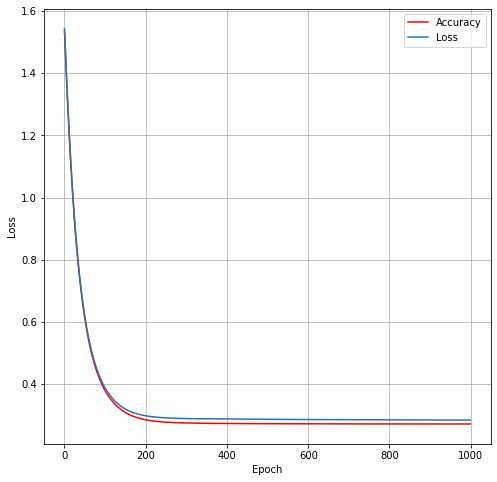

In [11]:
def LossHistory (history):
    plt.plot (history.history['val_loss'], c="r", label='Accuracy')
    plt.plot (history.history['loss'], label='Loss')
    plt.xlabel ('Epoch')
    plt.ylabel ('Loss')
    plt.legend ()
    plt.grid (True)
    plt.show ()

LossHistory (h)

### Exercise 10
Try your validation data on your trained model. How did you?

In [12]:
# This function will create models on demand
#
# Remember - they aren't trained.  Just the raw clay waiting to be moulded.

def MFactory ():
    model = Sequential()

    model.add (keras.layers.Normalization (input_dim = 7))
    model.layers[0].adapt (x)

    model.add (Dense (8, activation='sigmoid'))
    model.add (Dense (8, activation='sigmoid'))
    model.add (Dense (2, activation='softmax'))

    model.compile (loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

In [13]:
kfold = StratifiedKFold (n_splits=3, shuffle=True)
verify = []

print (model.metrics_names) # Cheating, model already exists in our Jupyter kernel

#
# Loop through different (3) combinations of the data
#
for train, test in kfold.split (x, subLoan.Default):

    predictor = MFactory ()                      # Fresh ANN

    h = predictor.fit (x[train], TrainingLabels[train], verbose=False, epochs=1000, batch_size = 500)
    Worked = predictor.evaluate (x[test], TrainingLabels[test], verbose=False)

    print (Worked)
    verify.append (100 * Worked[1])

['loss', 'accuracy']
[0.28373387455940247, 0.9168646335601807]
[0.29239824414253235, 0.9144893288612366]
[0.2938336431980133, 0.9144893288612366]


In [14]:
print (mean (verify), stddev (verify))

91.5281097094218 0.13713828073427545
